In [1]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

## Get Khurana enhancers with Khurana scores, and associated Chen scores 

In [13]:
import pandas as pd

def read_khurana_enhancers_intersect_chen_windows():
  # bed file created using: 
  # experiments/germline-model/chen-et-al-2022/intersect-khurana-enhancers-with-chen-windows.sh
  df = pd.read_csv(
      f"{CONSTRAINT_TOOLS_DATA}/khurana/khurana-enhancers-intersect-chen-windows.bed", 
      sep = '\t',
      names = [
          'chrom_enhancer', 'start_enhancer', 'end_enhancer', 
          'enhancer_deletion_status', 'enhancer_LoF_tolerance_status', 'enhancer_LoF_tolerance_prob', 
          'chrom_window', 'start_window', 'end_window', 
          'new_chen_score_window'
      ]
  )
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window', 'start_window', 'end_window'
  ])
  return df 

khurana_enhancers_intersect_chen_windows = read_khurana_enhancers_intersect_chen_windows()
khurana_enhancers_intersect_chen_windows

,chrom_enhancer,start_enhancer,end_enhancer,enhancer_deletion_status,enhancer_LoF_tolerance_status,enhancer_LoF_tolerance_prob,negative_new_chen_score_window
0,chr1,794220,794420,NotDeleted,LoF-tolerant,0.863272,-4.034545
1,chr1,794620,795020,NotDeleted,LoF-tolerant,0.919113,-4.034545
2,chr1,794620,795020,NotDeleted,LoF-tolerant,0.919113,-4.072486
3,chr1,803820,804220,NotDeleted,LoF-tolerant,0.884506,-3.779493
4,chr1,803820,804220,NotDeleted,LoF-tolerant,0.884506,-0.767485
...,...,...,...,...,...,...,...
351771,chr22,50739172,50740572,NotDeleted,Low-LoF-tolerance,0.263704,-2.476451
351772,chr22,50748972,50749972,NotDeleted,LoF-tolerant,0.737725,-2.543021
351773,chr22,50754572,50754772,NotDeleted,Low-LoF-tolerance,0.386335,0.087238
351774,chr22,50772572,50772972,NotDeleted,LoF-tolerant,0.902392,-2.204285


In [21]:
def aggregate_over_windows(df): 
    groups = df.groupby([
        'chrom_enhancer', 'start_enhancer', 'end_enhancer', 
        'enhancer_deletion_status', 'enhancer_LoF_tolerance_status', 'enhancer_LoF_tolerance_prob',         
    ])
    aggregation_functions = {'negative_new_chen_score_window': ['min', 'count']}
    aggregated = groups.agg(aggregation_functions)
    
    df = aggregated.reset_index()
    df.columns = [' '.join(col[::-1]).strip() for col in df.columns.values]
    return df

enhancers_with_khurana_and_chen_scores = aggregate_over_windows(khurana_enhancers_intersect_chen_windows)
enhancers_with_khurana_and_chen_scores

,chrom_enhancer,start_enhancer,end_enhancer,enhancer_deletion_status,enhancer_LoF_tolerance_status,enhancer_LoF_tolerance_prob,min negative_new_chen_score_window,count negative_new_chen_score_window
0,chr1,794220,794420,NotDeleted,LoF-tolerant,0.863272,-4.034545,1
1,chr1,794620,795020,NotDeleted,LoF-tolerant,0.919113,-4.072486,2
2,chr1,803820,804220,NotDeleted,LoF-tolerant,0.884506,-3.779493,2
3,chr1,804820,805620,NotDeleted,LoF-tolerant,0.824233,-3.761746,2
4,chr1,828420,830620,NotDeleted,Low-LoF-tolerance,0.348280,-2.366455,2
...,...,...,...,...,...,...,...,...
201406,chr9,138037348,138037548,NotDeleted,LoF-tolerant,0.869391,-1.328952,1
201407,chr9,138037948,138038948,NotDeleted,LoF-tolerant,0.957399,-2.355119,2
201408,chr9,138040548,138041148,NotDeleted,LoF-tolerant,0.962550,-2.570888,2
201409,chr9,138052748,138054748,NotDeleted,LoF-tolerant,0.591343,-5.088021,2


## Khurana scores are weakly correlated with Chen scores 

<AxesSubplot:xlabel='enhancer_LoF_tolerance_prob', ylabel='min negative_new_chen_score_window'>

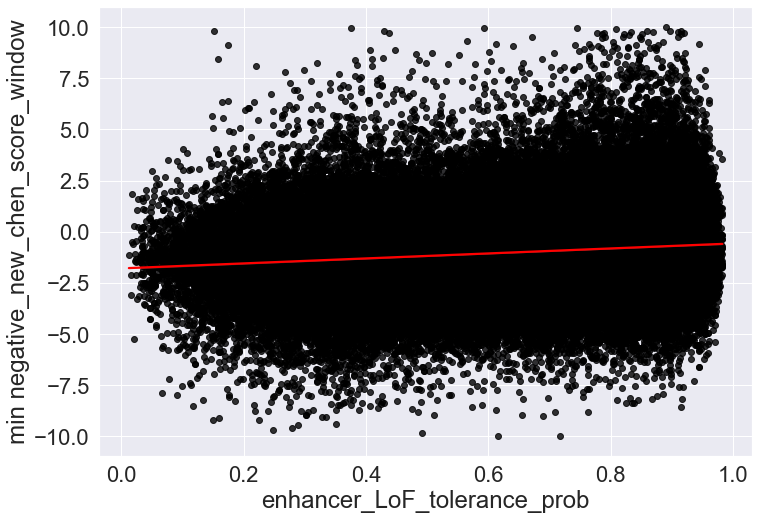

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns

# set size of figure using seaborn 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# set background color of figure using seaborn
sns.set(style="whitegrid", color_codes=True)

# set font size of axis labels two-foled using seaborn
sns.set(font_scale=2)

# scatter plot with regression line
sns.regplot(
    x=enhancers_with_khurana_and_chen_scores['enhancer_LoF_tolerance_prob'],
    y=enhancers_with_khurana_and_chen_scores['min negative_new_chen_score_window'],
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)

In [ ]:
# TODO
# 1. pull out "vista" and "LoF tolerant" enhancers from "khurana_table_S2"
# 2. annotate all enhancers as "vista" or "LoF tolerant" or "neither"
# 3. Look at the CDF of scores (Chen, McHale, Khurana) for all enhancers, just those annotated as "vista", and just those annotated as "LoF-tolerant", similar to Fig 4A

In [ ]:
# TODO [LONG SHOT] 
# Do SNVs (het or hom alt) in vista enhancers avoid the motifs that are enriched in those enhancers? 